In [1]:
# This notebook contains:
#
# Here we take 500K failed jobs and 375K successful jobs

In [2]:
# Connect to MYSQL database

hostname = 'localhost'
username = 'a1singh'
password = 'sdsc1234'
database = 'belle2'

import pandas as pd
import numpy as np

In [3]:
import sys
print(sys.executable)
print(sys.version)

/data/home/a1singh/anaconda3/envs/keras/bin/python
3.5.4 |Anaconda, Inc.| (default, Nov 20 2017, 18:44:38) 
[GCC 7.2.0]


In [4]:
import pymysql
from IPython.display import display, HTML

conn = pymysql.connect(host=hostname, user=username, passwd=password, db=database)
print(conn)

In [5]:
def batch(iterable, n=1):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]

## 1 Jobs table: get all 'failed' jobs and store to disk 

In [6]:
%%time

query       = 'SELECT * FROM Jobs WHERE Status = \'Failed\' '
failedJobs    = pd.read_sql_query(query,con=conn)

CPU times: user 1min 51s, sys: 3.16 s, total: 1min 54s
Wall time: 1min 54s


In [21]:
failedJobs.shape

NameError: name 'failedJobs' is not defined

In [32]:
failedJobs.to_pickle('all_failed_from_jobs_table.pickle')

In [30]:
failedJobs = pd.read_pickle('all_failed_from_jobs_table.pickle')

## 2 HBLI table: get all 'failed' jobs and store to disk 

In [92]:
listofjobids = failedJobs['JobID'].tolist()
listofjobids = list(set(listofjobids))
len(listofjobids)

1101447

In [ ]:
%%time
# # Keep only the rows whose jobID is in HeartBeatLogging table

query       = 'SELECT * FROM HeartBeatLoggingInfo WHERE JobID IN (' + ','.join((str(x) for x in listofjobids)) + ')'
dataHBLI_failed    = pd.read_sql_query(query,con=conn)

In [101]:
listofjobids = list(set(failedJobs['JobID'].tolist()) - set (dataHBLI_failed.JobID.unique().tolist()))

In [107]:
%%time
# # TEST TEST TEST TEST TEST 

query       = 'SELECT * FROM HeartBeatLoggingInfo WHERE JobID IN (' + ','.join((str(x) for x in listofjobids[:])) + ')'
dataHBLI_failed    = pd.read_sql_query(query,con=conn)
print(dataHBLI_failed.shape)

# # TEST TEST TEST TEST TEST 

(0, 4)
CPU times: user 137 ms, sys: 69.1 ms, total: 206 ms
Wall time: 11.6 s


In [30]:
dataHBLI_failed.to_pickle('all_failed_from_hbli_table.pickle')

In [20]:
dataHBLI_failed.shape, len(dataHBLI_failed.JobID.unique())

NameError: name 'dataHBLI_failed' is not defined

In [25]:
print()

In [26]:
dataHBLI_failed = pd.read_pickle('all_failed_from_hbli_table.pickle')

## 3 Jobs table: get all 'done' jobs and store to disk 

In [9]:
%%time

query       = 'SELECT * FROM Jobs WHERE Status = \'Done\''
successJobs    = pd.read_sql_query(query,con=conn)

CPU times: user 16min 39s, sys: 1min 36s, total: 18min 15s
Wall time: 19min 12s


In [2]:
import pandas as pd
successJobs = pd.read_pickle('all_done_from_jobs_table.pickle')

In [3]:
successJobs.shape

(9374544, 33)

In [4]:
successJobs_picked = successJobs.sample(847267)

In [14]:
successJobs_picked.shape

(847267, 33)

In [ ]:
successJobs_picked.c

In [5]:
del successJobs

In [36]:
successJobs.to_pickle('all_done_from_jobs_table.pickle')

In [13]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('.') if isfile(join('.', f))]
onlyfiles = [x for x in onlyfiles if 'listofdfs_collector' in x]
onlyfiles

['listofdfs_collector_275percent.pickle',
 'listofdfs_collector_185percent.pickle',
 'listofdfs_collector_315percent.pickle',
 'listofdfs_collector_235percent.pickle',
 'listofdfs_collector_105percent.pickle',
 'listofdfs_collector_350percent.pickle',
 'listofdfs_collector_100percent.pickle',
 'listofdfs_collector_395percent.pickle',
 'listofdfs_collector_70percent.pickle',
 'listofdfs_collector_385percent.pickle',
 'listofdfs_collector_260percent.pickle',
 'listofdfs_collector_150percent.pickle',
 'listofdfs_collector_50percent.pickle',
 'listofdfs_collector_295percent.pickle',
 'listofdfs_collector_245percent.pickle',
 'listofdfs_collector_215percent.pickle',
 'listofdfs_collector_330percent.pickle',
 'listofdfs_collector_200percent.pickle',
 'listofdfs_collector_360percent.pickle',
 'listofdfs_collector_250percent.pickle',
 'listofdfs_collector_60percent.pickle',
 'listofdfs_collector_145percent.pickle',
 'listofdfs_collector_220percent.pickle',
 'listofdfs_collector_155percent.pick

In [18]:
listofdonejobs = successJobs_picked.JobID.tolist()
listofdonejobs[0]+1

43199680

In [20]:
selectedDonedfs = []

print(len(onlyfiles))

counter = 0

for f in onlyfiles:
    # read df
    counter += 1
    alist = pd.read_pickle(f)
    df    = pd.concat(alist, ignore_index = True)
    
    # filter df
    A = df[df['JobID'].isin(listofdonejobs)].copy()
    
    # free memory
    del df
    del alist
    
    # store it
    selectedDonedfs.append(A)
    
    # print success
    print(counter, ' Stored :',A.shape)

71
1  Stored : (943879, 4)
2  Stored : (958536, 4)
3  Stored : (1185654, 4)
4  Stored : (1209061, 4)
5  Stored : (1244140, 4)
6  Stored : (563157, 4)
7  Stored : (1365936, 4)
8  Stored : (424949, 4)
9  Stored : (136671, 4)
10  Stored : (584899, 4)
11  Stored : (917521, 4)
12  Stored : (900183, 4)
13  Stored : (896709, 4)
14  Stored : (723094, 4)
15  Stored : (995545, 4)
16  Stored : (871369, 4)
17  Stored : (1152798, 4)
18  Stored : (1188058, 4)
19  Stored : (750267, 4)
20  Stored : (1092189, 4)
21  Stored : (873651, 4)
22  Stored : (824946, 4)
23  Stored : (929024, 4)
24  Stored : (880804, 4)
25  Stored : (1080832, 4)
26  Stored : (984300, 4)
27  Stored : (14508606, 4)
28  Stored : (931631, 4)
29  Stored : (921659, 4)
30  Stored : (949283, 4)
31  Stored : (574602, 4)
32  Stored : (1116763, 4)
33  Stored : (564382, 4)
34  Stored : (908915, 4)
35  Stored : (1037001, 4)
36  Stored : (951774, 4)
37  Stored : (1115453, 4)
38  Stored : (678835, 4)
39  Stored : (1195793, 4)
40  Stored : (892

In [21]:
dataHBLI_success = pd.concat(selectedDonedfs, ignore_index = True)

In [22]:
del selectedDonedfs

In [23]:
dataHBLI_success.shape

(77700797, 4)

In [ ]:
# Find similar number of Successful jobs

done_and_failed = 1101447+9374544
totaljobidcount   = 10485197

# only 9206 jobs are in different state 

## 4 HBLI table: get all 'failed' jobs and store to disk 

In [11]:
listofjobids = successJobs['JobID'].tolist()
listofjobids = list(set(listofjobids))
len(listofjobids)

9374544

In [12]:
%%time
# # Keep only the rows whose jobID is in HeartBeatLogging table

def hbli_fetch(listofjobids):
    query   = 'SELECT * FROM HeartBeatLoggingInfo WHERE JobID IN (' + ','.join((str(x) for x in listofjobids)) + ')'
    dataHBLI = pd.read_sql_query(query,con=conn)
    return dataHBLI

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 9.78 µs


In [13]:
import pymysql
from IPython.display import display, HTML
from time import gmtime, strftime

conn = pymysql.connect(host=hostname, user=username, passwd=password, db=database)
print(conn)

In [14]:
%%time

collector = []
loopcount = 0
import gc
import pickle

def checkpoint(alist, anum):
    # put the list of dfs to disk
    filename = 'listofdfs_collector_'+str(anum)+'percent.pickle'
    print('Checkpoint func > writing file: ', filename)
    with open(filename, 'wb') as handle:
        pickle.dump(alist, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
for jobs in batch(listofjobids, 2000):
    thisbatch = hbli_fetch(jobs)
    collector.append(thisbatch) #list of dfs
    
    if(loopcount%100 ==0):
        percent = 100*2000.0*(loopcount+1)/9374544.0
        print(int(percent), '%  ', strftime("%Y-%m-%d %H:%M:%S", gmtime()))
        
        if (int(percent)%25 == 0 and int(percent) > 0):
            checkpoint(collector, int(percent))
            print('Pushed collector to disk at ', int(percent), '%')
            collector = []
            gc.collect()
            
    loopcount += 1

0 %   2018-02-24 21:32:03
2 %   2018-02-24 21:35:38
4 %   2018-02-24 21:39:41
6 %   2018-02-24 21:44:25
8 %   2018-02-24 21:46:57
10 %   2018-02-24 21:47:36
12 %   2018-02-24 21:48:13
14 %   2018-02-24 21:54:39
17 %   2018-02-24 22:04:03
19 %   2018-02-24 22:14:08
21 %   2018-02-24 22:23:37
23 %   2018-02-24 22:32:46
25 %   2018-02-24 22:41:37
Checkpoint func > writing file:  listofdfs_collector_25percent.pickle
Pushed collector to disk at  25 %
27 %   2018-02-24 22:53:49
29 %   2018-02-24 23:02:50
32 %   2018-02-24 23:06:49
34 %   2018-02-24 23:14:40
36 %   2018-02-24 23:26:07
38 %   2018-02-24 23:38:26
40 %   2018-02-24 23:48:58
42 %   2018-02-24 23:57:21
44 %   2018-02-25 00:04:22
46 %   2018-02-25 00:12:15
49 %   2018-02-25 00:20:53
51 %   2018-02-25 00:30:05
53 %   2018-02-25 00:39:10
55 %   2018-02-25 00:48:52
57 %   2018-02-25 00:59:38
59 %   2018-02-25 01:10:23
61 %   2018-02-25 01:19:43
64 %   2018-02-25 01:29:23
66 %   2018-02-25 01:39:38
68 %   2018-02-25 01:49:25
70 %   201

In [18]:
len(collector)

3487

In [19]:
b=50
for jobs in batch(collector, 50):
    checkpoint(jobs, int(b))
    gc.collect()
    b+=5

Checkpoint func > writing file:  listofdfs_collector_50percent.pickle
Checkpoint func > writing file:  listofdfs_collector_55percent.pickle
Checkpoint func > writing file:  listofdfs_collector_60percent.pickle
Checkpoint func > writing file:  listofdfs_collector_65percent.pickle
Checkpoint func > writing file:  listofdfs_collector_70percent.pickle
Checkpoint func > writing file:  listofdfs_collector_75percent.pickle
Checkpoint func > writing file:  listofdfs_collector_80percent.pickle
Checkpoint func > writing file:  listofdfs_collector_85percent.pickle
Checkpoint func > writing file:  listofdfs_collector_90percent.pickle
Checkpoint func > writing file:  listofdfs_collector_95percent.pickle
Checkpoint func > writing file:  listofdfs_collector_100percent.pickle
Checkpoint func > writing file:  listofdfs_collector_105percent.pickle
Checkpoint func > writing file:  listofdfs_collector_110percent.pickle
Checkpoint func > writing file:  listofdfs_collector_115percent.pickle
Checkpoint func 

In [ ]:
%%time

biglist     = [] #empty to begin with
listoffiles = ['listofdfs_collector_25percent.pickle', 'listofdfs_collector_100percent.pickle']

for f in listoffiles:
    #read each list and store concat version in biglist
    
    with open(f, 'rb') as handle:
        lst = pickle.load( handle ) #list of dfs
        
    print(len(lst))
    
    df = pd.concat(lst, ignore_index = True) #concat each df in list to one big df
    
    print(df.shape)
    
    biglist.append(df) #push to biglist

In [23]:
import turicreate as tc

/data/home/a1singh/anaconda3/envs/keras/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [27]:
del collector_sframe

In [ ]:
gc.collect()
dataHBLI_successB = pd.concat(collector, ignore_index=True,copy=False) #len is same as len of 'listoffiles'
dataHBLI_successB.shape

In [ ]:
dataHBLI_success.to_pickle('all_done_from_hbli_table.pickle')

In [1]:
####################################^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^####################################
####################################^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^####################################
####################################^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^####################################
####################################^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^####################################
####################################^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^####################################

In [ ]:
dataHBLI_success = stackthese

In [2]:
import gc
gc.collect()

0

In [ ]:
%%time
# Total number of rows in HeartBeatLoggingInfo (ans - 906,320,307)
# number of distinct JobIDs (ans - 10,137,037) in HeartBeatLoggingInfo
# number of distinct JobIDs in Jobs (ans - 10,485,197)
# number of distinct JobGroup in Jobs (ans - 5405)
# number of distinct hearbeattime entries (ans - 1,616,7003)

In [ ]:
# Average Number of timestamps per jobID
16167003 / 10137037

In [ ]:
# Average number of key-value pairs per timestamp
906320307 / 16167003

### Combine Jobs tables pieces = (failed, success)

In [34]:
failedJobs.shape, successJobs_picked.shape

((1101447, 33), (847267, 33))

In [35]:
pieces = (failedJobs, successJobs_picked)

In [36]:
allJobs = pd.concat(pieces, ignore_index = True)
allJobs.shape

(1948714, 33)

In [37]:
del failedJobs
del successJobs_picked

### Combine HBLI tables pieces = (failed, success)

In [27]:
pieces = (dataHBLI_failed, dataHBLI_success)

In [28]:
allHBLI = pd.concat(pieces, ignore_index = True)

In [29]:
del dataHBLI_failed
del dataHBLI_success

# Process HBLI table: allHBLI (pivot, dropna, scale)

In [38]:
allHBLI.head(2)

,JobID,Name,Value,HeartBeatTime
0,23140766,AvailableDiskSpace,b'753392.0',2015-08-07 13:13:48
1,23140766,CPUConsumed,b'10.0',2015-08-07 13:13:48


In [39]:
allHBLI.shape

(123321956, 4)

In [40]:
allHBLI.Value = pd.to_numeric(allHBLI['Value'], errors='raise')

In [41]:
allHBLI.HeartBeatTime = pd.to_datetime(allHBLI['HeartBeatTime'], errors='raise')

In [42]:
# Number of unique jobIDs in 10M rows of dataHB (ans-185879)
allHBLI.JobID.nunique()

1603768

In [43]:
# Number of unique timestampes in 10M rows of dataHB (ans-242222)
allHBLI.HeartBeatTime.nunique()

9783534

In [ ]:
allHBLI.tail()

In [44]:
%%time
# 10 millions rows took 10 sec to pivot

allHBLI_wide=allHBLI.pivot_table(index=['JobID','HeartBeatTime'], columns='Name', values='Value')

CPU times: user 2min 53s, sys: 1min 35s, total: 4min 28s
Wall time: 4min 33s


In [45]:
# 1  million rows have shape (142863,  7) after pivot
# 10 million rows have shape (1428574, 7) after pivot

allHBLI_wide.shape

(17625888, 7)

In [46]:
allHBLI_wide.isnull().values.ravel().sum()

59260

In [47]:
# Drop the last few rows
allHBLI_wide = allHBLI_wide.dropna()

In [48]:
allHBLI_wide.shape

(17572524, 7)

In [49]:
allHBLI_wide.head(3)

,Name,AvailableDiskSpace,CPUConsumed,LoadAverage,MemoryUsed,RSS,Vsize,WallClockTime
JobID,HeartBeatTime,,,,,,,
23140766,2015-08-07 13:13:48,753392.0,10.0,22.02,36101188.0,110596.0,1459640.0,3.198161
23141083,2015-08-07 13:29:48,1544234.0,8.0,22.41,36037080.0,111956.0,1707264.0,2.890452
23205537,2015-08-08 22:43:00,568076.0,9.0,21.97,43807076.0,51376.0,760076.0,3.637860


In [ ]:
allHBLI_wide.columns

In [ ]:
allHBLI_wide.describe()

## Scale 'allHBLI_wide' table

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
allHBLI_wide[['AvailableDiskSpace', 'CPUConsumed', 'LoadAverage', 
             'MemoryUsed', 'RSS','Vsize', 'WallClockTime']] = scaler.fit_transform(allHBLI_wide[['AvailableDiskSpace', 
                                                                        'CPUConsumed', 'LoadAverage', 'MemoryUsed', 
                                                                        'RSS','Vsize', 'WallClockTime']])

In [51]:
import pickle

with open('mega_minmaxscaler.pickle', 'wb') as handle:
    pickle.dump(scaler, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
allHBLI_wide.describe()

In [52]:
allHBLI_wide = allHBLI_wide.reset_index()

In [53]:
allHBLI_wide.shape

(17572524, 9)

In [54]:
#########################
allHBLI_wide.to_pickle('mega_allHBLI_wide_scaled.pickle')
#########################

In [ ]:
with open('large_allHBLI_wide_scaled_4742707by9.pickle', 'rb') as handle:
    allHBLI_wide = pickle.load(handle)

In [55]:
allHBLI_wide.shape

(17572524, 9)

In [ ]:
allHBLI_wide.head(2)

#### End of HBLI table processing: allHBLI

# Process Jobs tables: allJobs

In [56]:
dataJobs = allJobs

In [ ]:
dataJobs.describe()

In [57]:
listofcolumns = dataJobs.columns.tolist()
listofcolumns

['JobID',
 'JobType',
 'DIRACSetup',
 'JobGroup',
 'JobSplitType',
 'MasterJobID',
 'Site',
 'JobName',
 'Owner',
 'OwnerDN',
 'OwnerGroup',
 'SubmissionTime',
 'RescheduleTime',
 'LastUpdateTime',
 'StartExecTime',
 'HeartBeatTime',
 'EndExecTime',
 'Status',
 'MinorStatus',
 'ApplicationStatus',
 'ApplicationNumStatus',
 'CPUTime',
 'UserPriority',
 'SystemPriority',
 'RescheduleCounter',
 'VerifiedFlag',
 'DeletedFlag',
 'KilledFlag',
 'FailedFlag',
 'ISandboxReadyFlag',
 'OSandboxReadyFlag',
 'RetrievedFlag',
 'AccountedFlag']

In [58]:
removelist = ['JobID','JobName','SubmissionTime', 'RescheduleTime', 'LastUpdateTime', 
              'StartExecTime', 'HeartBeatTime', 'EndExecTime']

for r in removelist:
    listofcolumns.remove(r)
    
print(listofcolumns)

['JobType', 'DIRACSetup', 'JobGroup', 'JobSplitType', 'MasterJobID', 'Site', 'Owner', 'OwnerDN', 'OwnerGroup', 'Status', 'MinorStatus', 'ApplicationStatus', 'ApplicationNumStatus', 'CPUTime', 'UserPriority', 'SystemPriority', 'RescheduleCounter', 'VerifiedFlag', 'DeletedFlag', 'KilledFlag', 'FailedFlag', 'ISandboxReadyFlag', 'OSandboxReadyFlag', 'RetrievedFlag', 'AccountedFlag']


In [59]:
dataJobs.shape

(1948714, 33)

In [60]:
cc = {}

for c in listofcolumns:
    #print(c)
    ll = len(dataJobs[c].unique().tolist())
    
    if ll > 0:
        #print('************ found > limit *')
        cc[c]=ll

for w in sorted(cc, key=cc.get, reverse=False):
  print(w, cc[w])

ISandboxReadyFlag 1
SystemPriority 1
FailedFlag 1
JobSplitType 1
DeletedFlag 1
MasterJobID 1
DIRACSetup 1
CPUTime 1
RetrievedFlag 1
KilledFlag 1
OSandboxReadyFlag 1
ApplicationNumStatus 1
VerifiedFlag 1
AccountedFlag 2
Status 2
Owner 4
OwnerGroup 4
OwnerDN 5
JobType 6
UserPriority 10
RescheduleCounter 21
MinorStatus 30
Site 64
ApplicationStatus 164
JobGroup 3579


In [61]:
### Decision: let us drop 'MinorStatus' and 'ApplicationStatus' and only predict 
### the 'Status' column
#   LABEL for prediction: only predict the 'Status' column

del dataJobs['MinorStatus']
del dataJobs['ApplicationStatus']

In [62]:
### Decision: let us drop all columns which have only single state, i.e. no fluctuation

for w in sorted(cc, key=cc.get, reverse=False):
    if cc[w] == 1:
        del dataJobs[w]
        print(w, cc[w])

ISandboxReadyFlag 1
SystemPriority 1
FailedFlag 1
JobSplitType 1
DeletedFlag 1
MasterJobID 1
DIRACSetup 1
CPUTime 1
RetrievedFlag 1
KilledFlag 1
OSandboxReadyFlag 1
ApplicationNumStatus 1
VerifiedFlag 1


In [63]:
del dataJobs['JobName'] #name is not important for prediction

In [64]:
dataJobs.columns.tolist()

['JobID',
 'JobType',
 'JobGroup',
 'Site',
 'Owner',
 'OwnerDN',
 'OwnerGroup',
 'SubmissionTime',
 'RescheduleTime',
 'LastUpdateTime',
 'StartExecTime',
 'HeartBeatTime',
 'EndExecTime',
 'Status',
 'UserPriority',
 'RescheduleCounter',
 'AccountedFlag']

In [ ]:
dataJobs[['SubmissionTime',
 'RescheduleTime',
 'LastUpdateTime',
 'StartExecTime',
 'HeartBeatTime',
 'EndExecTime']][:5]

In [66]:
### Decision: Convert times to deltas
import numpy as np
dataJobs['start_submit'] = (dataJobs['StartExecTime']-dataJobs['SubmissionTime']) / np.timedelta64(1, 'm')
dataJobs['hbeat_start']  = (dataJobs['HeartBeatTime']-dataJobs['StartExecTime']) / np.timedelta64(1, 'm')

for x in ['SubmissionTime','RescheduleTime','LastUpdateTime','StartExecTime','HeartBeatTime','EndExecTime']:
    del dataJobs[x]

In [67]:
# Decision: Remove the AccountedFlag at this stage
del dataJobs['AccountedFlag']

In [69]:
dataJobs.Status.value_counts()

Failed    1101447
Done       847267
Name: Status, dtype: int64

In [70]:
dataJobs.columns

Index(['JobID', 'JobType', 'JobGroup', 'Site', 'Owner', 'OwnerDN',
       'OwnerGroup', 'Status', 'UserPriority', 'RescheduleCounter',
       'start_submit', 'hbeat_start'],
      dtype='object')

In [71]:
dataJobs[:2]

,JobID,JobType,JobGroup,Site,Owner,OwnerDN,OwnerGroup,Status,UserPriority,RescheduleCounter,start_submit,hbeat_start
0,23140766,MCProductionBGx0,00000757,DIRAC.UAS.mx,dirac,/C=DE/O=GermanGrid/OU=KIT/CN=Robot - grid clie...,belle_mcprod,Failed,0,0,0.866667,9.833333
1,23141083,MCProductionBGx0,00000758,DIRAC.CINVESTAV.mx,dirac,/C=DE/O=GermanGrid/OU=KIT/CN=Robot - grid clie...,belle_mcprod,Failed,0,0,9.916667,10.433333


In [72]:
%%time

# Make categorical variables:
dj_encoded = pd.get_dummies(dataJobs, columns=['JobType','JobGroup','Site','Status','UserPriority'],
                           drop_first=True)

CPU times: user 1min 36s, sys: 12.2 s, total: 1min 48s
Wall time: 1min 48s


In [73]:
len(dj_encoded.columns.tolist())

3663

In [74]:
dj_encoded.columns.tolist()

['JobID',
 'Owner',
 'OwnerDN',
 'OwnerGroup',
 'RescheduleCounter',
 'start_submit',
 'hbeat_start',
 'JobType_MCProduction',
 'JobType_MCProductionBGx0',
 'JobType_Merge',
 'JobType_Test',
 'JobType_User',
 'JobGroup_00000757',
 'JobGroup_00000758',
 'JobGroup_00000808',
 'JobGroup_00000809',
 'JobGroup_00000974',
 'JobGroup_00000975',
 'JobGroup_00001303',
 'JobGroup_00001306',
 'JobGroup_00001368',
 'JobGroup_00001369',
 'JobGroup_00001370',
 'JobGroup_00001371',
 'JobGroup_00001372',
 'JobGroup_00001373',
 'JobGroup_00001374',
 'JobGroup_00001375',
 'JobGroup_00001376',
 'JobGroup_00001377',
 'JobGroup_00001378',
 'JobGroup_00001379',
 'JobGroup_00001380',
 'JobGroup_00001381',
 'JobGroup_00001386',
 'JobGroup_00001398',
 'JobGroup_00001404',
 'JobGroup_00001635',
 'JobGroup_00001636',
 'JobGroup_00001637',
 'JobGroup_00001638',
 'JobGroup_00001639',
 'JobGroup_00001640',
 'JobGroup_00001641',
 'JobGroup_00001642',
 'JobGroup_00001643',
 'JobGroup_00001644',
 'JobGroup_00001645',


In [75]:
# Before dropping first column in get_dummies, this returned 4150
len(dj_encoded[dj_encoded['Status_Failed']==True])

1101447

In [76]:
# After dropping first column in get_dummies, this returned 4150
len(dj_encoded[dj_encoded['Status_Failed']==False])

847267

In [77]:
dj_encoded.shape

(1948714, 3663)

In [78]:
######################################
dj_encoded.to_pickle('mega_allJobs_dj_encoded.pickle')
######################################

In [ ]:
with open('large_allJobs_featurized_875Kby322.pickle', 'rb') as handle:
    dj_encoded = pickle.load(handle)

In [79]:
dj_encoded.shape

(1948714, 3663)

In [80]:
# Use this finally
allJobs_encoded = dj_encoded

In [81]:
del dataJobs

In [82]:
del allHBLI

In [ ]:
#### End of all jobs table processing

# Join jobs tables

In [ ]:
# Test Train split each one into 50%
# Concat Test dfs and Train dfs,
# Now you have 50% from each class in train and test.

### >> Join 'allJobs_encoded' and 'allHBLI_wide"

In [6]:
allHBLI_wide = pd.read_pickle('mega_allHBLI_wide_scaled.pickle')
allHBLI_wide.shape

(17572524, 9)

In [47]:
allHBLI_wide.columns

Index(['JobID', 'HeartBeatTime', 'AvailableDiskSpace', 'CPUConsumed',
       'LoadAverage', 'MemoryUsed', 'RSS', 'Vsize', 'WallClockTime'],
      dtype='object', name='Name')

In [55]:
allJobs_encoded = pd.read_pickle('mega_allJobs_dj_encoded.pickle')
allJobs_encoded.shapeallJobs_encoded

(1948714, 3663)

In [56]:
allJobs_encoded.head(4)

,JobID,Owner,OwnerDN,OwnerGroup,RescheduleCounter,start_submit,hbeat_start,JobType_MCProduction,JobType_MCProductionBGx0,JobType_Merge,...,Status_Failed,UserPriority_1,UserPriority_2,UserPriority_3,UserPriority_4,UserPriority_5,UserPriority_6,UserPriority_7,UserPriority_9,UserPriority_10
0,23140766,dirac,/C=DE/O=GermanGrid/OU=KIT/CN=Robot - grid clie...,belle_mcprod,0,0.866667,9.833333,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,23141083,dirac,/C=DE/O=GermanGrid/OU=KIT/CN=Robot - grid clie...,belle_mcprod,0,9.916667,10.433333,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,23205537,dirac,/C=DE/O=GermanGrid/OU=KIT/CN=Robot - grid clie...,belle_mcprod,0,67.516667,797.883333,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,23205539,dirac,/C=DE/O=GermanGrid/OU=KIT/CN=Robot - grid clie...,belle_mcprod,0,70.416667,377.916667,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [61]:
lesscols = allJobs_encoded.columns.tolist()
print(len(lesscols)) #125

### Extra removal after noticing high accuracy
lesscols.remove('hbeat_start')
lesscols.remove('start_submit')

lesscols = [x for x in lesscols if x.find('JobGroup')== -1 and  x.find('Owner')==-1]

##############################################

len(lesscols) #122

3663


80

In [62]:
lesscols

['JobID',
 'RescheduleCounter',
 'JobType_MCProduction',
 'JobType_MCProductionBGx0',
 'JobType_Merge',
 'JobType_Test',
 'JobType_User',
 'Site_ARC.DESY.de',
 'Site_ARC.KIT.de',
 'Site_ARC.LMU2.de',
 'Site_ARC.MPPMU.de',
 'Site_ARC.SIGNET.si',
 'Site_CLOUD.AWS_Sydney.au',
 'Site_CLOUD.AWS_Tokyo.jp',
 'Site_CLOUD.AWS_Virginia.us',
 'Site_CLOUD.CC1_Krakow.pl',
 'Site_DIRAC.BINP.ru',
 'Site_DIRAC.Beihang.cn',
 'Site_DIRAC.CINVESTAV.mx',
 'Site_DIRAC.DESY.de',
 'Site_DIRAC.Hokudai.jp',
 'Site_DIRAC.IITG.in',
 'Site_DIRAC.MIPT.ru',
 'Site_DIRAC.NDU.jp',
 'Site_DIRAC.Nagoya.jp',
 'Site_DIRAC.Nara-WU.jp',
 'Site_DIRAC.Niigata.jp',
 'Site_DIRAC.Osaka-CU.jp',
 'Site_DIRAC.PNNL.us',
 'Site_DIRAC.PNNL2.us',
 'Site_DIRAC.RCNP.jp',
 'Site_DIRAC.SSU.kr',
 'Site_DIRAC.TIFR.in',
 'Site_DIRAC.TMU.jp',
 'Site_DIRAC.Test.jp',
 'Site_DIRAC.Tokyo.jp',
 'Site_DIRAC.UAS.mx',
 'Site_DIRAC.UVic.ca',
 'Site_DIRAC.Yamagata.jp',
 'Site_DIRAC.Yonsei.kr',
 'Site_Group.DESY.de',
 'Site_Group.KEK.jp',
 'Site_Group.K

In [63]:
allJobs_encodedsmall = allJobs_encoded[lesscols].copy()
del allJobs_encoded

In [64]:
allJobs_encoded = allJobs_encodedsmall

In [65]:
allJobs_encoded.shape

(1948714, 80)

In [66]:
lesscols

['JobID',
 'RescheduleCounter',
 'JobType_MCProduction',
 'JobType_MCProductionBGx0',
 'JobType_Merge',
 'JobType_Test',
 'JobType_User',
 'Site_ARC.DESY.de',
 'Site_ARC.KIT.de',
 'Site_ARC.LMU2.de',
 'Site_ARC.MPPMU.de',
 'Site_ARC.SIGNET.si',
 'Site_CLOUD.AWS_Sydney.au',
 'Site_CLOUD.AWS_Tokyo.jp',
 'Site_CLOUD.AWS_Virginia.us',
 'Site_CLOUD.CC1_Krakow.pl',
 'Site_DIRAC.BINP.ru',
 'Site_DIRAC.Beihang.cn',
 'Site_DIRAC.CINVESTAV.mx',
 'Site_DIRAC.DESY.de',
 'Site_DIRAC.Hokudai.jp',
 'Site_DIRAC.IITG.in',
 'Site_DIRAC.MIPT.ru',
 'Site_DIRAC.NDU.jp',
 'Site_DIRAC.Nagoya.jp',
 'Site_DIRAC.Nara-WU.jp',
 'Site_DIRAC.Niigata.jp',
 'Site_DIRAC.Osaka-CU.jp',
 'Site_DIRAC.PNNL.us',
 'Site_DIRAC.PNNL2.us',
 'Site_DIRAC.RCNP.jp',
 'Site_DIRAC.SSU.kr',
 'Site_DIRAC.TIFR.in',
 'Site_DIRAC.TMU.jp',
 'Site_DIRAC.Test.jp',
 'Site_DIRAC.Tokyo.jp',
 'Site_DIRAC.UAS.mx',
 'Site_DIRAC.UVic.ca',
 'Site_DIRAC.Yamagata.jp',
 'Site_DIRAC.Yonsei.kr',
 'Site_Group.DESY.de',
 'Site_Group.KEK.jp',
 'Site_Group.K

In [67]:
%%time
raw_samples = pd.merge(allHBLI_wide, allJobs_encoded, on =['JobID'])
print(raw_samples.shape)

(17572524, 88)
CPU times: user 7.54 s, sys: 1.81 s, total: 9.34 s
Wall time: 9.39 s


In [69]:
del allHBLI_wide
del allJobs_encoded

In [68]:
raw_samples.shape 

(17572524, 88)

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

sample_counts = pd.value_counts(raw_samples['JobID'].values, sort=False)

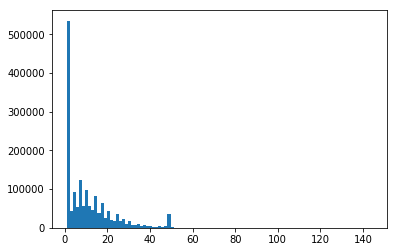

In [71]:
plt.hist(sample_counts.values, bins = 100)
plt.show()

# Sample Generation

# Convert Pandas dataframe to LSTM 3D tensor

# Set Threshold

In [72]:
thresholdd = 1

In [73]:
sum(sample_counts.values>=thresholdd)

1603691

In [74]:
### Decision: Number of timesteps per sample = 3
# Shape of 3D matrix should be (#samples)x(3)x(132)

sum(sample_counts.values<thresholdd)

0

In [ ]:
# Delete rows of JobIDs with  fewer than 3 timestamps

dff = raw_samples['JobID'].value_counts()
print(dff.sample(3))

dff = dff[dff<thresholdd]


dff = dff.reset_index()
dff = dff.rename(index=str, columns={"JobID": "count", "index": "JobID"})

print(dff.sample(5))
print(dff.head())

remove_list = dff['JobID'].tolist()
remove_list[:5]

In [101]:
remove_list=[]

In [102]:
# THis CLEANED is not the final one, 
# Go forward to see : this is just an initialization

cleaned = raw_samples[~raw_samples['JobID'].isin(remove_list)]
cleaned.shape, raw_samples.shape

((17572524, 88), (17572524, 88))

In [103]:
# Number of unique JobIDs in cleaned
totalleftjobslist = cleaned.JobID.unique().tolist()
totalleftjobs = len(cleaned.JobID.unique().tolist())

In [104]:
import random

indices = random.sample(range(len(totalleftjobslist)), int(totalleftjobs * .50))
takeoutlist = [totalleftjobslist[i] for i in sorted(indices)]

len(takeoutlist), totalleftjobs 

(801845, 1603691)

In [105]:
print(len(remove_list))
remove_list = remove_list + takeoutlist
print(len(remove_list))

0
801845


# Train on cleaned, Test on takeoutdf

In [106]:
cleaned = raw_samples[~raw_samples['JobID'].isin(remove_list)]
cleaned.shape, raw_samples.shape

((8794109, 88), (17572524, 88))

In [107]:
len(cleaned[cleaned['Status_Failed']==True])/cleaned.shape[0]

0.36945186829046583

In [109]:
import pickle

with open('mega_cleaned_for_training.pickle', 'wb') as handle:
    pickle.dump(cleaned, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [110]:
takeoutdf = raw_samples[raw_samples['JobID'].isin(takeoutlist)]
takeoutdf.shape, raw_samples.shape

((8778415, 88), (17572524, 88))

In [111]:
len(takeoutdf[takeoutdf['Status_Failed']==True])/takeoutdf.shape[0]

0.36842801348535015

In [112]:
with open('mega_takeoutdf_for_testing.pickle', 'wb') as handle:
    pickle.dump(takeoutdf, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [113]:
######################

In [114]:
# Count values in cleaned

cleaned_counts = pd.value_counts(cleaned['JobID'].values, sort=False)
sum(cleaned_counts.values<thresholdd), sum(cleaned_counts.values>=thresholdd)

(0, 801846)

In [115]:
len((sample_counts.values))

1603691

In [116]:
# Build Training Features

In [117]:
cleaned.shape

(8794109, 88)

In [118]:
# Takes a df and converts it to 3D tensor
# Each sample will have k time steps

def samples_features(df_input):
    
    k = thresholdd
    input_cols = train_feat
    
    # takes a df
    # Put your inputs into a single list
    
    df = pd.DataFrame()
    
    df['single_input_vector'] = df_input[input_cols].apply(tuple, axis=1).apply(list)
    
    # Double-encapsulate list so that you can sum it in the next step and keep time steps as separate elements
    df['single_input_vector'] = df.single_input_vector.apply(lambda x: [list(x)])
        
    # The starting point
    df['cumulative_input_vectors'] = df['single_input_vector'].shift(0)
    
    for i in range(1,k):
        df['cumulative_input_vectors'] += df['single_input_vector'].shift(i)
          
    df.dropna(inplace=True)     # does operation in place & returns None

    # Extract your training data
    X_ = np.asarray(df.cumulative_input_vectors)
    
    # Use hstack to and reshape to make the inputs a 3d vector
    X = np.vstack(X_).reshape(len(df), k, len(input_cols))
    
    # Clean up
    del df
    
    return X
    # returns 3D array

In [119]:
# Label Column ('Status_Failed' is the label column)
label_col = ['Status_Failed']

In [120]:
thresholdd #Check it matched the title

1

# Build X (each job separately)

In [121]:
cleaned.shape

(8794109, 88)

In [122]:
cleaned.isnull().values.ravel().sum()

0

In [123]:
cleaned = cleaned.dropna()

In [124]:
cleaned.isnull().values.ravel().sum()

0

In [125]:
cleaned.columns.tolist()

['JobID',
 'HeartBeatTime',
 'AvailableDiskSpace',
 'CPUConsumed',
 'LoadAverage',
 'MemoryUsed',
 'RSS',
 'Vsize',
 'WallClockTime',
 'RescheduleCounter',
 'JobType_MCProduction',
 'JobType_MCProductionBGx0',
 'JobType_Merge',
 'JobType_Test',
 'JobType_User',
 'Site_ARC.DESY.de',
 'Site_ARC.KIT.de',
 'Site_ARC.LMU2.de',
 'Site_ARC.MPPMU.de',
 'Site_ARC.SIGNET.si',
 'Site_CLOUD.AWS_Sydney.au',
 'Site_CLOUD.AWS_Tokyo.jp',
 'Site_CLOUD.AWS_Virginia.us',
 'Site_CLOUD.CC1_Krakow.pl',
 'Site_DIRAC.BINP.ru',
 'Site_DIRAC.Beihang.cn',
 'Site_DIRAC.CINVESTAV.mx',
 'Site_DIRAC.DESY.de',
 'Site_DIRAC.Hokudai.jp',
 'Site_DIRAC.IITG.in',
 'Site_DIRAC.MIPT.ru',
 'Site_DIRAC.NDU.jp',
 'Site_DIRAC.Nagoya.jp',
 'Site_DIRAC.Nara-WU.jp',
 'Site_DIRAC.Niigata.jp',
 'Site_DIRAC.Osaka-CU.jp',
 'Site_DIRAC.PNNL.us',
 'Site_DIRAC.PNNL2.us',
 'Site_DIRAC.RCNP.jp',
 'Site_DIRAC.SSU.kr',
 'Site_DIRAC.TIFR.in',
 'Site_DIRAC.TMU.jp',
 'Site_DIRAC.Test.jp',
 'Site_DIRAC.Tokyo.jp',
 'Site_DIRAC.UAS.mx',
 'Site_DIR

In [126]:
##################################################

In [127]:
cols = cleaned.columns.tolist()

In [130]:
train_feat = cleaned.columns.tolist()
print(len(train_feat)) #125

train_feat.remove('HeartBeatTime')
train_feat.remove('WallClockTime')
train_feat.remove('JobID')
train_feat.remove('Status_Failed')

for c in cols:
    if 'JobGroup' in c:
        train_feat.remove(c)
##############################################

len(train_feat) #122

88


84

In [131]:
train_feat

['AvailableDiskSpace',
 'CPUConsumed',
 'LoadAverage',
 'MemoryUsed',
 'RSS',
 'Vsize',
 'RescheduleCounter',
 'JobType_MCProduction',
 'JobType_MCProductionBGx0',
 'JobType_Merge',
 'JobType_Test',
 'JobType_User',
 'Site_ARC.DESY.de',
 'Site_ARC.KIT.de',
 'Site_ARC.LMU2.de',
 'Site_ARC.MPPMU.de',
 'Site_ARC.SIGNET.si',
 'Site_CLOUD.AWS_Sydney.au',
 'Site_CLOUD.AWS_Tokyo.jp',
 'Site_CLOUD.AWS_Virginia.us',
 'Site_CLOUD.CC1_Krakow.pl',
 'Site_DIRAC.BINP.ru',
 'Site_DIRAC.Beihang.cn',
 'Site_DIRAC.CINVESTAV.mx',
 'Site_DIRAC.DESY.de',
 'Site_DIRAC.Hokudai.jp',
 'Site_DIRAC.IITG.in',
 'Site_DIRAC.MIPT.ru',
 'Site_DIRAC.NDU.jp',
 'Site_DIRAC.Nagoya.jp',
 'Site_DIRAC.Nara-WU.jp',
 'Site_DIRAC.Niigata.jp',
 'Site_DIRAC.Osaka-CU.jp',
 'Site_DIRAC.PNNL.us',
 'Site_DIRAC.PNNL2.us',
 'Site_DIRAC.RCNP.jp',
 'Site_DIRAC.SSU.kr',
 'Site_DIRAC.TIFR.in',
 'Site_DIRAC.TMU.jp',
 'Site_DIRAC.Test.jp',
 'Site_DIRAC.Tokyo.jp',
 'Site_DIRAC.UAS.mx',
 'Site_DIRAC.UVic.ca',
 'Site_DIRAC.Yamagata.jp',
 'Site

In [132]:
%%time
cleanedgrouped = cleaned.groupby('JobID')

CPU times: user 679 µs, sys: 0 ns, total: 679 µs
Wall time: 797 µs


In [133]:
print(thresholdd), cleaned.shape

1


(None, (8794109, 88))

In [ ]:
print(thresholdd), cleaned.shape

In [ ]:
import pickle

with open('training_features.pickle', 'wb') as handle:
    pickle.dump(train_feat, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Cleaned df to 3D tensor

### Make X

In [134]:
import pandas as pd
from joblib import Parallel, delayed
import multiprocessing

multiprocessing.cpu_count()

24

In [135]:

def applyParallel(dfGrouped, func):
    retLst = Parallel(n_jobs=multiprocessing.cpu_count())(delayed(func)(group) for name, group in dfGrouped)
    return retLst

In [136]:
%%time

collecttrain = applyParallel(cleanedgrouped, samples_features)

CPU times: user 12min, sys: 49.8 s, total: 12min 50s
Wall time: 13min 8s


In [138]:
len(collecttrain)

801846

In [139]:
import pickle

with open('mega_collecttrain.pickle', 'wb') as handle:
    pickle.dump(collecttrain, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# >> Start here for importing training and test data

### Unpack X from output of function

In [140]:
X=[]

In [141]:
%%time
for x in collecttrain:
    #len(x)
    for i in x:
        X.append(i)

CPU times: user 3.07 s, sys: 593 ms, total: 3.66 s
Wall time: 3.66 s


In [142]:
X = np.array(X)
X.shape

(8794109, 1, 84)

In [143]:
## X is ready (Y)

## Make Y

In [144]:
# Label Column ('Status_Failed' is the label column)
label_col = ['Status_Failed']

In [145]:
# Takes a df and converts it to 3D tensor
# Each sample will have k time steps

def samples_label(df_input):
    
    k = thresholdd
    input_cols = label_col
    
    
    # takes a df
    # Put your inputs into a single list
    
    df = pd.DataFrame()
    
    df['single_input_vector'] = df_input[input_cols].apply(tuple, axis=1).apply(list)
    
    # Double-encapsulate list so that you can sum it in the next step and keep time steps as separate elements
    df['single_input_vector'] = df.single_input_vector.apply(lambda x: [list(x)])
        
    # The starting point
    df['cumulative_input_vectors'] = df['single_input_vector'].shift(0)
    
    for i in range(1,k):
        df['cumulative_input_vectors'] += df['single_input_vector'].shift(i)
          
    df.dropna(inplace=True)     # does operation in place & returns None

    # Extract your training data
    X_ = np.asarray(df.cumulative_input_vectors)
    
    # Use hstack to and reshape to make the inputs a 3d vector
    X = np.vstack(X_).reshape(len(df), k, len(input_cols))
    
    # Clean up
    del df
    
    return X
    # returns 3D array

#### Build Y (each job separately)

In [146]:
cleanedgrouped = cleaned.groupby('JobID')

In [147]:
label_col

['Status_Failed']

In [148]:
%%time

collectlabel = applyParallel(cleanedgrouped, samples_label)

CPU times: user 12min 18s, sys: 1min 10s, total: 13min 28s
Wall time: 13min 53s


In [149]:
import pickle

with open('mega_collectlabel.pickle', 'wb') as handle:
    pickle.dump(collectlabel, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [153]:
len(collectlabel)

801846

In [154]:
### Unpack Y from output of function

In [155]:
Y=[]

In [156]:
%%time
for x in collectlabel:
    #len(x)
    for i in x:
        Y.append(i)

CPU times: user 3.32 s, sys: 444 ms, total: 3.77 s
Wall time: 3.77 s


In [157]:
Y = np.array(Y)
Y.shape

(8794109, 1, 1)

In [158]:
X.shape

(8794109, 1, 84)

In [159]:
YY = np.array([x[0][0] for x in Y]).reshape(len(Y),1)
YY.shape

(8794109, 1)

In [160]:
YY[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [161]:
## Y is ready
thresholdd

1

In [162]:
X.shape, YY.shape

((8794109, 1, 84), (8794109, 1))

In [151]:
cleaned['JobID'].nunique(), cleaned.shape

(801846, (8794109, 88))

In [152]:
takeoutdf['JobID'].nunique(), takeoutdf.shape

(801845, (8778415, 88))

## Shuffle X,Y in Unison

In [163]:
# Unison shuffle
def unison_shuffled_copies(a, b):
    import numpy as np
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [164]:
%%time
X_final, Y_final = unison_shuffled_copies(X,YY)

CPU times: user 2.01 s, sys: 1.8 s, total: 3.8 s
Wall time: 3.81 s


In [165]:
X_final.shape, Y_final.shape

((8794109, 1, 84), (8794109, 1))

In [166]:
sum(Y_final[:])

array([3249000])

del X
del Y
del YY

In [167]:
X_final, Y_final = unison_shuffled_copies(X_final, Y_final)

In [168]:
Y_final[:10]

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]])

# Start: Build test set from 'takeoutdf'

## Build X_test, Y_test using each JobID separately

In [172]:
takeoutdf.Status_Failed.value_counts()

0    5544201
1    3234214
Name: Status_Failed, dtype: int64

In [173]:
# Training Features

In [174]:
print(len(train_feat)) 

84


In [175]:
(train_feat)

['AvailableDiskSpace',
 'CPUConsumed',
 'LoadAverage',
 'MemoryUsed',
 'RSS',
 'Vsize',
 'RescheduleCounter',
 'JobType_MCProduction',
 'JobType_MCProductionBGx0',
 'JobType_Merge',
 'JobType_Test',
 'JobType_User',
 'Site_ARC.DESY.de',
 'Site_ARC.KIT.de',
 'Site_ARC.LMU2.de',
 'Site_ARC.MPPMU.de',
 'Site_ARC.SIGNET.si',
 'Site_CLOUD.AWS_Sydney.au',
 'Site_CLOUD.AWS_Tokyo.jp',
 'Site_CLOUD.AWS_Virginia.us',
 'Site_CLOUD.CC1_Krakow.pl',
 'Site_DIRAC.BINP.ru',
 'Site_DIRAC.Beihang.cn',
 'Site_DIRAC.CINVESTAV.mx',
 'Site_DIRAC.DESY.de',
 'Site_DIRAC.Hokudai.jp',
 'Site_DIRAC.IITG.in',
 'Site_DIRAC.MIPT.ru',
 'Site_DIRAC.NDU.jp',
 'Site_DIRAC.Nagoya.jp',
 'Site_DIRAC.Nara-WU.jp',
 'Site_DIRAC.Niigata.jp',
 'Site_DIRAC.Osaka-CU.jp',
 'Site_DIRAC.PNNL.us',
 'Site_DIRAC.PNNL2.us',
 'Site_DIRAC.RCNP.jp',
 'Site_DIRAC.SSU.kr',
 'Site_DIRAC.TIFR.in',
 'Site_DIRAC.TMU.jp',
 'Site_DIRAC.Test.jp',
 'Site_DIRAC.Tokyo.jp',
 'Site_DIRAC.UAS.mx',
 'Site_DIRAC.UVic.ca',
 'Site_DIRAC.Yamagata.jp',
 'Site

In [176]:
# Label Column ('Status_Failed' is the label column)
print(label_col)

['Status_Failed']


In [177]:
takeoutdf.shape

(8778415, 88)

In [178]:
takeoutdf.isnull().values.ravel().sum()

0

In [179]:
takeoutdf = takeoutdf.dropna()

In [180]:
takeoutdf.isnull().values.ravel().sum()

0

In [181]:
takeoutdf.columns

Index(['JobID', 'HeartBeatTime', 'AvailableDiskSpace', 'CPUConsumed',
       'LoadAverage', 'MemoryUsed', 'RSS', 'Vsize', 'WallClockTime',
       'RescheduleCounter', 'JobType_MCProduction', 'JobType_MCProductionBGx0',
       'JobType_Merge', 'JobType_Test', 'JobType_User', 'Site_ARC.DESY.de',
       'Site_ARC.KIT.de', 'Site_ARC.LMU2.de', 'Site_ARC.MPPMU.de',
       'Site_ARC.SIGNET.si', 'Site_CLOUD.AWS_Sydney.au',
       'Site_CLOUD.AWS_Tokyo.jp', 'Site_CLOUD.AWS_Virginia.us',
       'Site_CLOUD.CC1_Krakow.pl', 'Site_DIRAC.BINP.ru',
       'Site_DIRAC.Beihang.cn', 'Site_DIRAC.CINVESTAV.mx',
       'Site_DIRAC.DESY.de', 'Site_DIRAC.Hokudai.jp', 'Site_DIRAC.IITG.in',
       'Site_DIRAC.MIPT.ru', 'Site_DIRAC.NDU.jp', 'Site_DIRAC.Nagoya.jp',
       'Site_DIRAC.Nara-WU.jp', 'Site_DIRAC.Niigata.jp',
       'Site_DIRAC.Osaka-CU.jp', 'Site_DIRAC.PNNL.us', 'Site_DIRAC.PNNL2.us',
       'Site_DIRAC.RCNP.jp', 'Site_DIRAC.SSU.kr', 'Site_DIRAC.TIFR.in',
       'Site_DIRAC.TMU.jp', 'Site_DIRAC.Test

########################################################
takeoutdf.to_pickle('takeoutdf_for_test_samples.pickle')
########################################################

###  Make X_test

In [182]:
takeoutdfgrouped = takeoutdf.groupby('JobID')

In [183]:
len(train_feat)

84

In [184]:
%%time
collectXtest = applyParallel(takeoutdfgrouped, samples_features)

CPU times: user 12min 28s, sys: 1min 40s, total: 14min 9s
Wall time: 24min 4s


In [185]:
import pickle

with open('mega_collectXtest.pickle', 'wb') as handle:
    pickle.dump(collectXtest, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [186]:
# Testcase 1 of function sample_features:

check = 0
j_checks = takeoutdf.JobID.sample(20)

for k in j_checks:
    
    v = takeoutdfgrouped.get_group(k)
    
    if(True):
        #print(v.columns.tolist())
        A = np.array(v)
        #print(train_feat)
        B = samples_features(v)
        check += 1
        
        if(len(A) == len(B)):
            print(k, 'Lengths match')
        else:
            print(k, 'Lengths NOT match')
        
        # Tests
        for x,y in zip(A,B):
            #print(x)
            #print(y)
            
            if not (np.all([ m==n for (m,n) in zip(x[2:8] , y[0][0:6]) ])):
                print(k, 'NOK')
                
    if(check == len(j_checks)):
        break

42849294 Lengths match
37304595 Lengths match
41515302 Lengths match
33169777 Lengths match
43003503 Lengths match
44079441 Lengths match
47573569 Lengths match
43613146 Lengths match
45807203 Lengths match
37688976 Lengths match
41594301 Lengths match
37604903 Lengths match
46637189 Lengths match
46247603 Lengths match
45762130 Lengths match
42818419 Lengths match
45457464 Lengths match
39959275 Lengths match
43042653 Lengths match
45132138 Lengths match


In [187]:
takeoutdf.head(4)

,JobID,HeartBeatTime,AvailableDiskSpace,CPUConsumed,LoadAverage,MemoryUsed,RSS,Vsize,WallClockTime,RescheduleCounter,...,Status_Failed,UserPriority_1,UserPriority_2,UserPriority_3,UserPriority_4,UserPriority_5,UserPriority_6,UserPriority_7,UserPriority_9,UserPriority_10
1,23141083,2015-08-07 13:29:48,0.000076,0.000030,0.000501,0.041367,0.000670,0.000016,0.000010,0,...,1,0,0,0,0,0,0,0,0,0
42,23205643,2015-08-08 22:50:00,0.000030,0.000030,0.000508,0.047930,0.000305,0.000007,0.000012,0,...,1,0,0,0,0,0,0,0,0,0
43,23205643,2015-08-08 23:20:01,0.000030,0.006463,0.000551,0.049164,0.004673,0.000025,0.007010,0,...,1,0,0,0,0,0,0,0,0,0
44,23205643,2015-08-08 23:50:00,0.000030,0.013179,0.000551,0.050041,0.004786,0.000027,0.013997,0,...,1,0,0,0,0,0,0,0,0,0


In [190]:
collectXtest[100].shape

(18, 1, 84)

### Unpack X_test

In [191]:
X_test=[]

In [192]:
%%time
for x in collectXtest:
    #len(x)
    for i in x:
        X_test.append(i)

CPU times: user 4.23 s, sys: 2.03 s, total: 6.26 s
Wall time: 6.38 s


In [193]:
X_test = np.array(X_test)
X_test.shape

(8778415, 1, 84)

In [ ]:
## X_test is ready

### Make Y_test

In [194]:
%%time
collecttestlabel = applyParallel(takeoutdfgrouped, samples_label)

CPU times: user 13min 5s, sys: 1min 50s, total: 14min 55s
Wall time: 15min 22s


In [195]:
len(collecttestlabel)

801845

In [196]:
import pickle

with open('mega_collecttestlabel.pickle', 'wb') as handle:
    pickle.dump(collecttestlabel, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Unpack Y_test

In [197]:
Y_t=[]

In [198]:
%%time
for x in collecttestlabel:
    #len(x)
    for i in x:
        Y_t.append(i)

CPU times: user 3.39 s, sys: 453 ms, total: 3.84 s
Wall time: 3.87 s


In [199]:
Y_t = np.array(Y_t)
Y_t.shape

(8778415, 1, 1)

In [200]:
Y_test = np.array([x[0][0] for x in Y_t]).reshape(len(Y_t),1)
Y_test.shape

(8778415, 1)

In [201]:
Y_test[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [202]:
## Y_test is ready

In [203]:
X_test.shape, Y_test.shape

((8778415, 1, 84), (8778415, 1))

In [204]:
X_final.shape, Y_final.shape

((8794109, 1, 84), (8794109, 1))

In [205]:
sum(Y_test[:]), len(Y_test)

(array([3234214]), 8778415)

In [206]:
del Y_t

# End test set from 'takeoutdf'

## Build Model

In [207]:
input_length = X_final.shape[1]

input_dim = X_final.shape[2]

# Output dimensions is the shape of a single output vector
# In this case it's just 1, but it could be more
output_dim = len(Y_final[0])

In [208]:
sum([x[0] for x in Y_final])/ len(Y_final)

0.36945186829046583

In [209]:
Y_final[:5]

array([[0],
       [1],
       [0],
       [1],
       [0]])

In [210]:
from keras.models import Model, Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout
input_dim, input_length, output_dim

/data/home/a1singh/anaconda3/envs/keras/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(84, 1, 1)

In [211]:
# Model 1

def create_model1(input_dim = input_dim, input_length = input_length, output_dim=output_dim):
    print ('Creating model 1...')
    model = Sequential()
    model.add(LSTM(20, input_shape=(input_length,input_dim),return_sequences=True))
    model.add(LSTM(20))
    model.add(Dense(output_dim, activation='sigmoid'))

    print ('Compiling...')
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['binary_accuracy'])
    return model

In [212]:
# Model 2

def create_model2(input_dim = input_dim, input_length = input_length, output_dim=output_dim):
    print ('Creating model 2...')
    model = Sequential()
    model.add(LSTM(50, input_shape=(input_length,input_dim),return_sequences=True))
    model.add(LSTM(50, input_shape=(input_length,input_dim),return_sequences=True))
    model.add(LSTM(50, input_shape=(input_length,input_dim),return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(output_dim, activation='sigmoid'))

    print ('Compiling...')
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['binary_accuracy'])
    return model

In [213]:
# Model 3

def create_model3(input_dim = input_dim, input_length = input_length, output_dim=output_dim):
    print ('Creating model 3...')
    model = Sequential()
    model.add(LSTM(100, input_shape=(input_length,input_dim),return_sequences=True))
    model.add(LSTM(100, input_shape=(input_length,input_dim),return_sequences=True))
    model.add(LSTM(100, input_shape=(input_length,input_dim),return_sequences=True))
    model.add(LSTM(100, input_shape=(input_length,input_dim),return_sequences=True))
    model.add(LSTM(100, input_shape=(input_length,input_dim),return_sequences=True))
    model.add(LSTM(100))
    model.add(Dense(output_dim, activation='sigmoid'))

    print ('Compiling...')
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['binary_accuracy'])
    return model

# Model 1

In [218]:
model1 = create_model1()

Creating model 1...
Compiling...


In [219]:
%%time

print ('Fitting model...')
history = model1.fit(X_final,Y_final,batch_size=250, epochs=100, validation_split = 0.10, verbose = 1)

Fitting model...
Train on 7914698 samples, validate on 879411 samples
Epoch 1/100
7914698/7914698 [==============================] - 202s 26us/step - loss: 0.5036 - binary_accuracy: 0.7531 - val_loss: 0.4856 - val_binary_accuracy: 0.7667
Epoch 2/100
7914698/7914698 [==============================] - 199s 25us/step - loss: 0.4825 - binary_accuracy: 0.7678 - val_loss: 0.4803 - val_binary_accuracy: 0.7701
Epoch 3/100
7914698/7914698 [==============================] - 197s 25us/step - loss: 0.4760 - binary_accuracy: 0.7715 - val_loss: 0.4718 - val_binary_accuracy: 0.7751
Epoch 4/100
7914698/7914698 [==============================] - 200s 25us/step - loss: 0.4704 - binary_accuracy: 0.7747 - val_loss: 0.4671 - val_binary_accuracy: 0.7767
Epoch 5/100
7914698/7914698 [==============================] - 198s 25us/step - loss: 0.4661 - binary_accuracy: 0.7772 - val_loss: 0.4625 - val_binary_accuracy: 0.7794
Epoch 6/100
7914698/7914698 [==============================] - 195s 25us/step - loss: 0.46

7914698/7914698 [==============================] - 225s 28us/step - loss: 0.4254 - binary_accuracy: 0.7997 - val_loss: 0.4246 - val_binary_accuracy: 0.8013
Epoch 50/100
7914698/7914698 [==============================] - 224s 28us/step - loss: 0.4253 - binary_accuracy: 0.7998 - val_loss: 0.4249 - val_binary_accuracy: 0.8008
Epoch 51/100
7914698/7914698 [==============================] - 224s 28us/step - loss: 0.4251 - binary_accuracy: 0.7998 - val_loss: 0.4240 - val_binary_accuracy: 0.8015
Epoch 52/100
7914698/7914698 [==============================] - 224s 28us/step - loss: 0.4249 - binary_accuracy: 0.8000 - val_loss: 0.4239 - val_binary_accuracy: 0.8010
Epoch 53/100
7914698/7914698 [==============================] - 215s 27us/step - loss: 0.4247 - binary_accuracy: 0.8001 - val_loss: 0.4245 - val_binary_accuracy: 0.8007
Epoch 54/100
7914698/7914698 [==============================] - 213s 27us/step - loss: 0.4246 - binary_accuracy: 0.8002 - val_loss: 0.4237 - val_binary_accuracy: 0.8011

7914698/7914698 [==============================] - 220s 28us/step - loss: 0.4190 - binary_accuracy: 0.8039 - val_loss: 0.4190 - val_binary_accuracy: 0.8050
Epoch 98/100
7914698/7914698 [==============================] - 216s 27us/step - loss: 0.4188 - binary_accuracy: 0.8041 - val_loss: 0.4206 - val_binary_accuracy: 0.8027
Epoch 99/100
7914698/7914698 [==============================] - 204s 26us/step - loss: 0.4187 - binary_accuracy: 0.8041 - val_loss: 0.4182 - val_binary_accuracy: 0.8046
Epoch 100/100
7914698/7914698 [==============================] - 221s 28us/step - loss: 0.4186 - binary_accuracy: 0.8042 - val_loss: 0.4187 - val_binary_accuracy: 0.8041
CPU times: user 20h 42min 34s, sys: 4h 57min 50s, total: 1d 1h 40min 24s
Wall time: 6h 4min 23s


In [220]:
loss, accuracy = model1.evaluate(X_test, Y_test)

8778415/8778415 [==============================] - 511s 58us/step


# Accuracy

In [221]:
loss, accuracy

(0.4232276695884197, 0.8020938859691641)

In [222]:
# when taking 10 timesteps, and keeping separate test and training JobIDs
# loss, accuracy is: 
# on X_test, Y_test

In [223]:
y_pred = model1.predict(X_test)

In [237]:
model1.save('mega_model1.pickle')

In [ ]:
y_pred[15000:15010]

In [238]:
model1.save('mega_model1.pickle')

# Binary classification accuracy

In [225]:
y_true = pd.Series([x[0] for x in Y_test])

# Use np.rint for rounding off 
y_predicted = pd.Series([ np.rint(j[0]) for j in y_pred])

In [226]:
np.mean(np.equal(y_true, y_predicted))

0.8020938859691641

# Precision, Recall, fscore

In [227]:
from sklearn.metrics import precision_recall_fscore_support as score

In [228]:
precision, recall, fscore, support = score(y_true, y_predicted)

In [229]:
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.82125985 0.76229752]
recall: [0.87766046 0.67255506]
fscore: [0.84852396 0.71461983]
support: [5544201 3234214]


# Confusion matrix

In [230]:
pd.crosstab(y_true, y_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0,4865926,678275,5544201
1,1059027,2175187,3234214
All,5924953,2853462,8778415


In [ ]:
# Worst case error bound on JobID specific 'Status' prediction error:

100*(9155+48481)/2368345

In [231]:
len(takeoutdf.JobID.unique().tolist()), len(cleaned.JobID.unique().tolist())

(801845, 801846)

In [232]:
sum(takeoutdf["JobID"].value_counts()==1)

238995

In [233]:
len(X_test[(y_true==1) & (y_predicted==0)])

1059027

In [234]:
# Verify that there is no intersection between training and test jobs

list(set(takeoutdf.JobID.tolist()) & set(cleaned.JobID.tolist()))

[]

In [235]:
# Predicting all 0s ??
sum([ (j) for j in y_predicted]), len(y_predicted)

(2853462.0, 8778415)

In [236]:
import pickle

with open('mega_training_features.pickle', 'wb') as handle:
    pickle.dump(train_feat, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
#### Model 2 Start

# Get min/max timestamp on cleaned & takeoutdf

# Model 2

In [239]:
model2 = create_model2()

Creating model 2...
Compiling...


In [240]:
%%time

print ('Fitting model...')
history = model2.fit(X_final,Y_final,batch_size=250, epochs=100, validation_split = 0.10, verbose = 1)

Fitting model...
Train on 7914698 samples, validate on 879411 samples
Epoch 1/100
7914698/7914698 [==============================] - 502s 63us/step - loss: 0.4932 - binary_accuracy: 0.7601 - val_loss: 0.4748 - val_binary_accuracy: 0.7723
Epoch 2/100
7914698/7914698 [==============================] - 499s 63us/step - loss: 0.4676 - binary_accuracy: 0.7757 - val_loss: 0.4594 - val_binary_accuracy: 0.7807
Epoch 3/100
7914698/7914698 [==============================] - 501s 63us/step - loss: 0.4558 - binary_accuracy: 0.7817 - val_loss: 0.4521 - val_binary_accuracy: 0.7842
Epoch 4/100
7914698/7914698 [==============================] - 503s 64us/step - loss: 0.4469 - binary_accuracy: 0.7864 - val_loss: 0.4419 - val_binary_accuracy: 0.7897
Epoch 5/100
7914698/7914698 [==============================] - 499s 63us/step - loss: 0.4405 - binary_accuracy: 0.7898 - val_loss: 0.4382 - val_binary_accuracy: 0.7922
Epoch 6/100
7914698/7914698 [==============================] - 503s 64us/step - loss: 0.43

7914698/7914698 [==============================] - 502s 63us/step - loss: 0.3934 - binary_accuracy: 0.8166 - val_loss: 0.3928 - val_binary_accuracy: 0.8174
Epoch 50/100
7914698/7914698 [==============================] - 487s 62us/step - loss: 0.3932 - binary_accuracy: 0.8168 - val_loss: 0.3929 - val_binary_accuracy: 0.8172
Epoch 51/100
7914698/7914698 [==============================] - 503s 64us/step - loss: 0.3928 - binary_accuracy: 0.8170 - val_loss: 0.3920 - val_binary_accuracy: 0.8184
Epoch 52/100
7914698/7914698 [==============================] - 499s 63us/step - loss: 0.3927 - binary_accuracy: 0.8170 - val_loss: 0.3918 - val_binary_accuracy: 0.8178
Epoch 53/100
7914698/7914698 [==============================] - 498s 63us/step - loss: 0.3923 - binary_accuracy: 0.8172 - val_loss: 0.3977 - val_binary_accuracy: 0.8145
Epoch 54/100
7914698/7914698 [==============================] - 486s 61us/step - loss: 0.3923 - binary_accuracy: 0.8172 - val_loss: 0.3934 - val_binary_accuracy: 0.8174

7914698/7914698 [==============================] - 480s 61us/step - loss: 0.3865 - binary_accuracy: 0.8202 - val_loss: 0.3875 - val_binary_accuracy: 0.8198
Epoch 98/100
7914698/7914698 [==============================] - 497s 63us/step - loss: 0.3864 - binary_accuracy: 0.8204 - val_loss: 0.3876 - val_binary_accuracy: 0.8203
Epoch 99/100
7914698/7914698 [==============================] - 485s 61us/step - loss: 0.3863 - binary_accuracy: 0.8204 - val_loss: 0.3863 - val_binary_accuracy: 0.8212
Epoch 100/100
7914698/7914698 [==============================] - 487s 62us/step - loss: 0.3862 - binary_accuracy: 0.8204 - val_loss: 0.3857 - val_binary_accuracy: 0.8213
CPU times: user 2d 10h 52min 53s, sys: 9h 13min 47s, total: 2d 20h 6min 41s
Wall time: 13h 47min 11s


In [241]:
loss, accuracy = model2.evaluate(X_test, Y_test)

8778415/8778415 [==============================] - 724s 83us/step


# Accuracy

In [242]:
loss, accuracy

(0.39732971976983505, 0.8165441027793809)

In [243]:
# when taking 10 timesteps, and keeping separate test and training JobIDs
# loss, accuracy is: 
# on X_test, Y_test

In [244]:
y_pred = model2.predict(X_test)

In [245]:
## Save

In [246]:
model2.save('mega_model2.pickle')

In [ ]:
y_pred[15000:15010]

# Binary classification accuracy

In [247]:
y_true = pd.Series([x[0] for x in Y_test])

# Use np.rint for rounding off 
y_predicted = pd.Series([ np.rint(j[0]) for j in y_pred])

In [248]:
np.mean(np.equal(y_true, y_predicted))

0.8165441027793742

# Precision, Recall, fscore

In [249]:
from sklearn.metrics import precision_recall_fscore_support as score

In [250]:
precision, recall, fscore, support = score(y_true, y_predicted)

In [251]:
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.83674082 0.77638502]
recall: [0.88152143 0.70515773]
fscore: [0.8585476 0.7390592]
support: [5544201 3234214]


# Confusion matrix

In [252]:
pd.crosstab(y_true, y_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0,4887332,656869,5544201
1,953583,2280631,3234214
All,5840915,2937500,8778415


In [253]:
# Worst case error bound on JobID specific 'Status' prediction error:

100*(7618+46967)/2368345

2.3047740088542845

In [254]:
len(takeoutdf.JobID.unique().tolist()), len(cleaned.JobID.unique().tolist())

(801845, 801846)

In [255]:
sum(takeoutdf["JobID"].value_counts()==1)

238995

In [256]:
len(X_test[(y_true==1) & (y_predicted==0)])

953583

In [257]:
# Verify that there is no intersection between training and test jobs

list(set(takeoutdf.JobID.tolist()) & set(cleaned.JobID.tolist()))

[]

In [258]:
# Predicting all 0s ??
sum([ (j) for j in y_predicted]), len(y_predicted)

(2937500.0, 8778415)

In [ ]:
#### Model 2 End

In [ ]:
#### Model 3 Start

# Model 3

In [259]:
model3 = create_model3()

Creating model 3...
Compiling...


In [ ]:
%%time

print ('Fitting model...')
history = model3.fit(X_final,Y_final,batch_size=250, epochs=100, validation_split = 0.10, verbose = 1)

In [ ]:
loss, accuracy = model3.evaluate(X_test, Y_test)

# Accuracy

In [ ]:
loss, accuracy

In [ ]:
# when taking 10 timesteps, and keeping separate test and training JobIDs
# loss, accuracy is: 
# on X_test, Y_test

In [ ]:
y_pred = model3.predict(X_test)

In [ ]:
y_pred[15000:15010]

## Save Model 3

In [ ]:
model3.save('large_model3_tsteps1_features65_partII.pickle')

# Binary classification accuracy

In [ ]:
y_true = pd.Series([x[0] for x in Y_test])

# Use np.rint for rounding off 
y_predicted = pd.Series([ np.rint(j[0]) for j in y_pred])

In [ ]:
np.mean(np.equal(y_true, y_predicted))

# Precision, Recall, fscore

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

In [ ]:
precision, recall, fscore, support = score(y_true, y_predicted)

In [ ]:
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

# Confusion matrix

In [ ]:
pd.crosstab(y_true, y_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
# Worst case error bound on JobID specific 'Status' prediction error:

100*(7440+45791)/2368345

In [ ]:
len(takeoutdf.JobID.unique().tolist()), len(cleaned.JobID.unique().tolist())

In [ ]:
sum(takeoutdf["JobID"].value_counts()==1)

In [ ]:
len(X_test[(y_true==1) & (y_predicted==0)])

In [ ]:
# Verify that there is no intersection between training and test jobs

len(set(takeoutdf.JobID.tolist()) & set(cleaned.JobID.tolist()))

In [ ]:
len(set(takeoutdf.JobID.tolist())), len(set(cleaned.JobID.tolist()))

In [ ]:
# Predicting all 0s ??
sum([ (j) for j in y_predicted]), len(y_predicted)

In [ ]:
#### Model 3 End

# Valid code above this line

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model3.png')